In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                      

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [10]:
modelpath = 'MNIST_CNN.hdf5'
checkpointer=ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 30, batch_size=200, verbose = 0, callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.08864, saving model to MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08864 to 0.05639, saving model to MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05639 to 0.04744, saving model to MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04744 to 0.04494, saving model to MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04494 to 0.04480, saving model to MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04480 to 0.04295, saving model to MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04295 to 0.04108, saving model to MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04108

Epoch 9: val_loss improved from 0.04108 to 0.03776, saving model to MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03776

Epoch 11: val_loss did not improve from 0.03776

Epoch 12: val_loss did not improve from 0.03776

Epoch 13: val_loss did not improve from 0.03776

Epoch 14: val_loss did not improve from 0.03776

Epoch 15: val_loss did not improve fro

In [12]:
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0327 - accuracy: 0.9909

 Test Accuracy: 0.9909


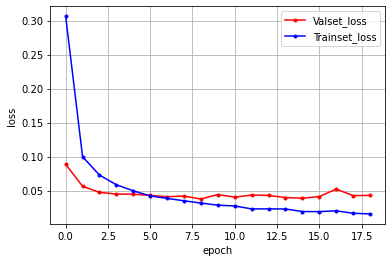

In [14]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Valset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()